In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def pvalue(n, length, p):
    print(f"n = {n}, length = {length}")
    n, length = int(10**n), int(10**length)
    #TODO this piece of code will crash kernel if both > 4.5
    A = np.random.rand(n, length, 10) > p
    W = np.sum(
        (A.astype('int') - 
        (~A).astype('int')
        ), axis=1)
    return stats.normaltest(W)[-1].mean()
x = np.linspace(1, 4,15)
y = np.linspace(1, 4,15)
X, Y = np.meshgrid(x, y)

n = 1.0, length = 1.0
n = 1.0, length = 1.0
n = 1.2142857142857142, length = 1.0
n = 1.4285714285714286, length = 1.0
n = 1.6428571428571428, length = 1.0
n = 1.8571428571428572, length = 1.0
n = 2.071428571428571, length = 1.0
n = 2.2857142857142856, length = 1.0
n = 2.5, length = 1.0
n = 2.7142857142857144, length = 1.0
n = 2.9285714285714284, length = 1.0
n = 3.142857142857143, length = 1.0
n = 3.357142857142857, length = 1.0
n = 3.571428571428571, length = 1.0
n = 3.7857142857142856, length = 1.0
n = 4.0, length = 1.0
n = 1.0, length = 1.2142857142857142
n = 1.2142857142857142, length = 1.2142857142857142
n = 1.4285714285714286, length = 1.2142857142857142
n = 1.6428571428571428, length = 1.2142857142857142
n = 1.8571428571428572, length = 1.2142857142857142
n = 2.071428571428571, length = 1.2142857142857142
n = 2.2857142857142856, length = 1.2142857142857142
n = 2.5, length = 1.2142857142857142
n = 2.7142857142857144, length = 1.2142857142857142
n = 2.9285714285714284, length = 1.

/opt/homebrew/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/homebrew/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


n = 1.0, length = 1.6428571428571428
n = 1.2142857142857142, length = 1.6428571428571428
n = 1.4285714285714286, length = 1.6428571428571428
n = 1.6428571428571428, length = 1.6428571428571428
n = 1.8571428571428572, length = 1.6428571428571428
n = 2.071428571428571, length = 1.6428571428571428
n = 2.2857142857142856, length = 1.6428571428571428
n = 2.5, length = 1.6428571428571428
n = 2.7142857142857144, length = 1.6428571428571428
n = 2.9285714285714284, length = 1.6428571428571428
n = 3.142857142857143, length = 1.6428571428571428
n = 3.357142857142857, length = 1.6428571428571428
n = 3.571428571428571, length = 1.6428571428571428
n = 3.7857142857142856, length = 1.6428571428571428
n = 4.0, length = 1.6428571428571428
n = 1.0, length = 1.8571428571428572
n = 1.2142857142857142, length = 1.8571428571428572
n = 1.4285714285714286, length = 1.8571428571428572
n = 1.6428571428571428, length = 1.8571428571428572
n = 1.8571428571428572, length = 1.8571428571428572
n = 2.071428571428571, l

Text(0.5, 1.0, 'p-value for normal test')

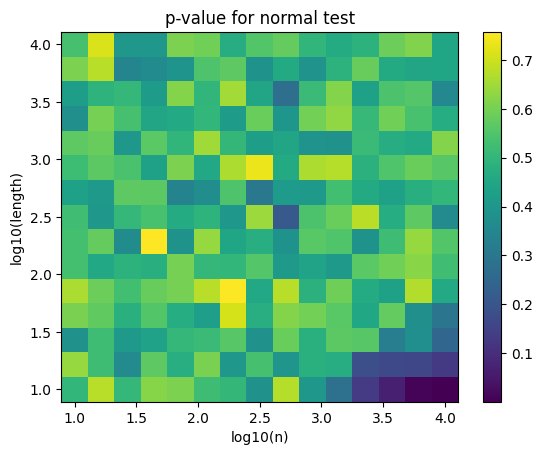

In [3]:
Z = np.vectorize(pvalue)(X, Y, 0.5)
np.save('pvalue.npy', Z)
print('saved')
plt.pcolormesh(X, Y, Z)
plt.colorbar()
plt.xlabel('log10(n)')
plt.ylabel('log10(length)')
plt.title('p-value for normal test')

Observation: No significant trend of p-value is spotted. The p value is especially low in the right-bottom conner.  

NormaltestResult(statistic=31908.32063811536, pvalue=0.0)

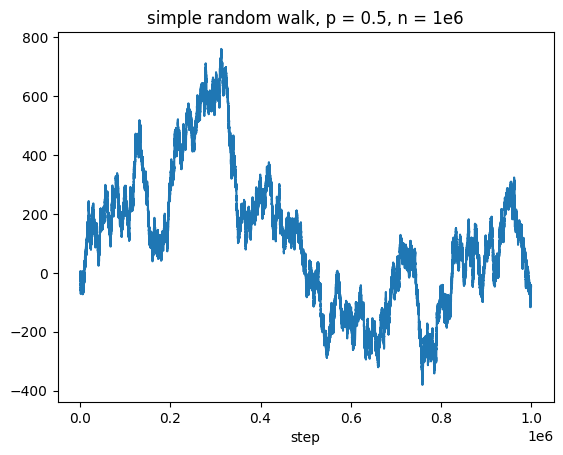

In [3]:
n = 1000
p = 0.5
A = np.random.rand(n, n) > p
W = np.cumsum(
    (A.astype('int') - 
    (~A).astype('int')
    ).flatten())
plt.plot(W)
plt.xlabel('step')
plt.title('simple random walk, p = 0.5, n = 1e6')

stats.normaltest(W)

NormaltestResult(statistic=24835.02873195967, pvalue=0.0)

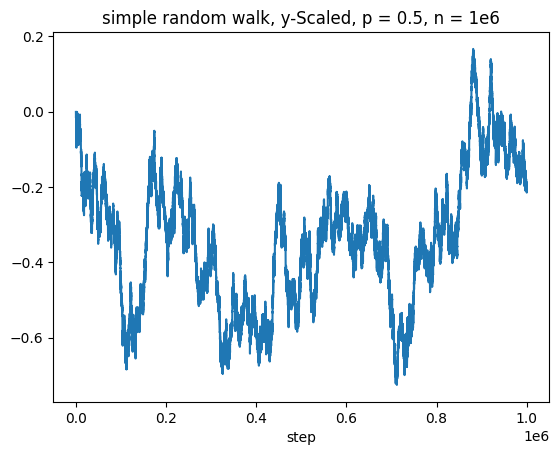

In [5]:
n = 1000
p = 0.5
A = np.random.rand(n, n) > p
W = np.cumsum(
    (A.astype('int') - 
    (~A).astype('int')
    ).flatten())
plt.plot(W/n)
plt.xlabel('step')
plt.title('simple random walk, y-Scaled, p = 0.5, n = 1e6')

stats.normaltest(W)

This should converge to a Brownian motion, according to Donsker's theorem. 